In [45]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                               App  \
2712        3446  GO Keyboard - Emoticon keyboard, Free Theme, GIF   
6803        7862                                Emergency Brain CT   
1742        2239                                     Real Racing 3   
8667        9810                   ES Billing System (Offline App)   
4365        5320                     Official AL Fishing & Hunting   

              Category  Rating  Reviews  Size      Installs  Type  Price  \
2712   PERSONALIZATION     4.4  2591941   NaN  100,000,000+  Free      0   
6803           MEDICAL     NaN        2  19.0           10+  Paid  $0.99   
1742            FAMILY     4.5   354384  71.0   10,000,000+  Free      0   
8667      PRODUCTIVITY     5.0        1   4.2          100+  Free      0   
4365  TRAVEL_AND_LOCAL     4.2     1291  40.0       50,000+  Free      0   

     Content Rating                     Genres      Last Updated  \
2712      

In [47]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null object
Type              9659 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [49]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [51]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [53]:
# Average rating of apps
avg_app_rating = np.mean(apps['Rating'])
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


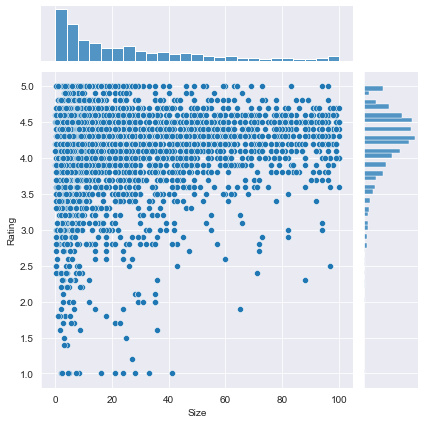

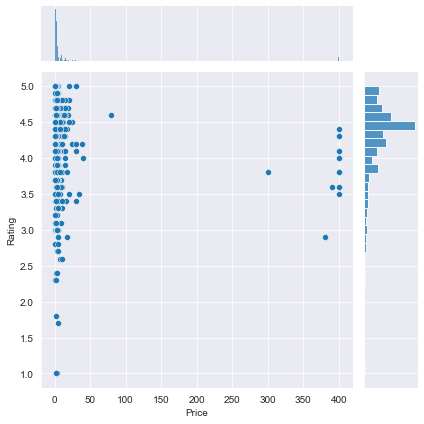

In [55]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.dropna(subset=['Rating', 'Size'])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


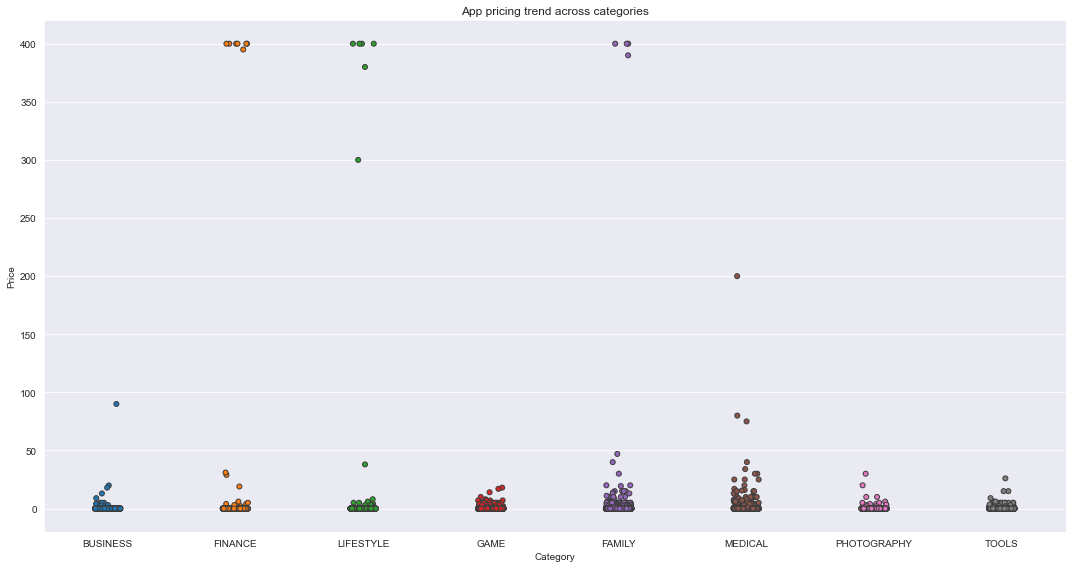

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

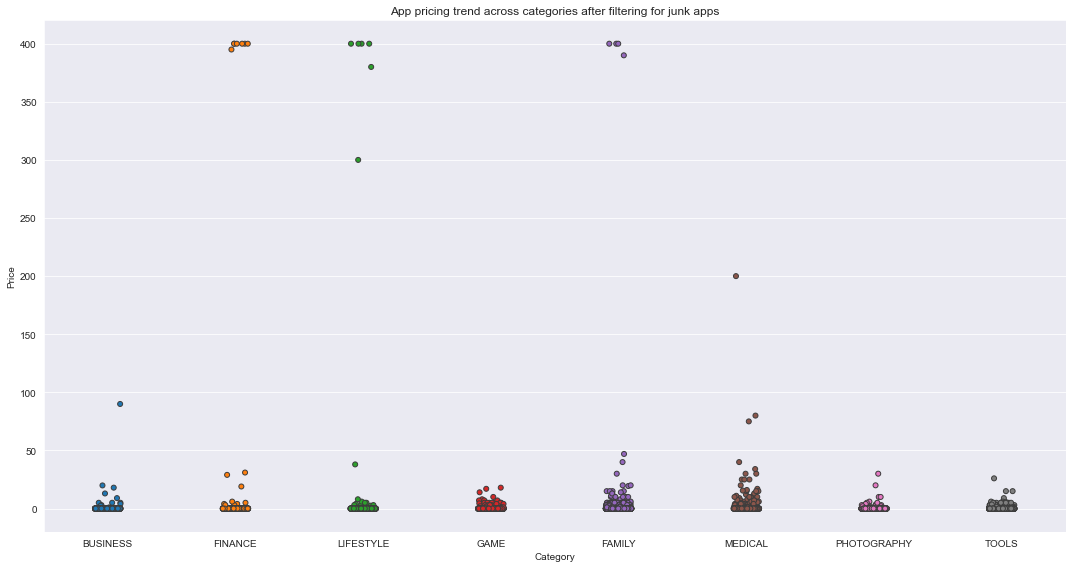

In [59]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [61]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [63]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df, on='App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df[] y = merged_df[] data = ...)
ax.set_title('Sentiment Polarity Distribution')

AttributeError: 'ellipsis' object has no attribute 'dropna'